In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('/Users/jacksonsorenson/Downloads/UltimateClassicRock.csv')
df.head()

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
0,Play A Simple Song,38 Special,38 Special,1977,3:13,4,0.521,0.367,0,-13.866,1,0.0278,0.6920,0.000003,0.1080,0.789,83.412,16
1,Four Wheels,38 Special,38 Special,1977,4:43,4,0.535,0.710,2,-12.287,1,0.0428,0.0100,0.023000,0.0495,0.445,160.361,10
2,Fly Away,38 Special,38 Special,1977,5:13,4,0.563,0.563,2,-10.781,1,0.0263,0.0357,0.001850,0.1400,0.564,106.739,13
3,Tell Everybody,38 Special,38 Special,1977,4:09,4,0.638,0.694,11,-10.206,0,0.0310,0.1610,0.000034,0.0908,0.936,124.962,10
4,Just Wanna Rock & Roll,38 Special,38 Special,1977,5:57,4,0.388,0.701,2,-9.984,1,0.0360,0.0130,0.042200,0.1150,0.769,126.769,11


In [4]:
df.isnull().sum()

Track               0
Artist              0
Album               0
Year                0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
dtype: int64

In [5]:
artist_pop = df.groupby('Artist')['Popularity'].sum()
artist_pop

Artist
38 Special        1919
ABBA              4909
Aerosmith         5050
Air Suppy         3135
Alice Cooper      5732
                  ... 
Toto              4209
Twisted Sister    1530
Van Halen         4808
Whitesnake        2528
ZZ Top            4998
Name: Popularity, Length: 94, dtype: int64

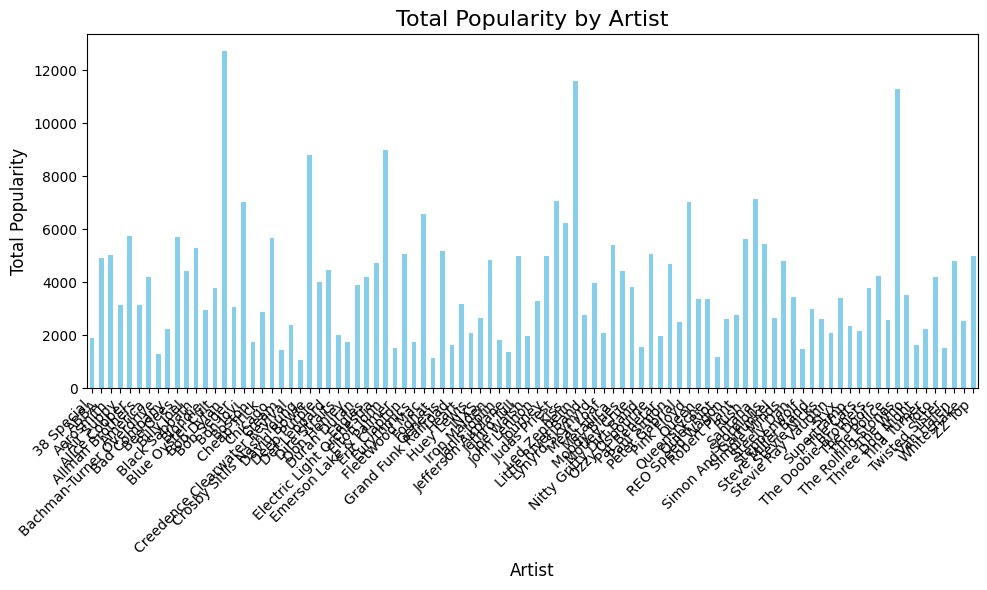

In [6]:

plt.figure(figsize=(10, 6)) 
artist_pop.plot(kind='bar', color='skyblue')
plt.title('Total Popularity by Artist', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Total Popularity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
unique_artists = df['Artist'].nunique()

sum_pop = df['Popularity'].sum()

avg_likeability = sum_pop / unique_artists

print("Unique Artists:", unique_artists)
print("Average Likeability per Artist:", avg_likeability)

Unique Artists: 94
Average Likeability per Artist: 3895.074468085106


In [8]:
def popular_artists(artist_pop, avg_likeability):
    popular_artists = artist_pop[artist_pop > avg_likeability]
    return popular_artists

print(popular_artists(artist_pop, avg_likeability))

Artist
ABBA                         4909
Aerosmith                    5050
Alice Cooper                 5732
America                      4187
Bee Gees                     5719
Billy Joel                   4434
Black Sabbath                5292
Bob Dylan                   12721
Bon Jovi                     7039
Chicago                      5685
David Bowie                  8798
Deep Purple                  4022
Def Leppard                  4456
Eagles                       4191
Electric Light Orchestra     4737
Elton John                   8982
Eric Clapton                 5072
Fleetwood Mac                6592
Genesis                      5187
Iron Maiden                  4857
Jethro Tull                  4994
Journey                      5010
Judas Priest                 7070
Kiss                         6226
Led Zeppelin                11595
Lynyrd Skynyrd               3963
Metallica                    5417
Moody Blues                  4444
Ozzy Osbourne                5056
Paul Si

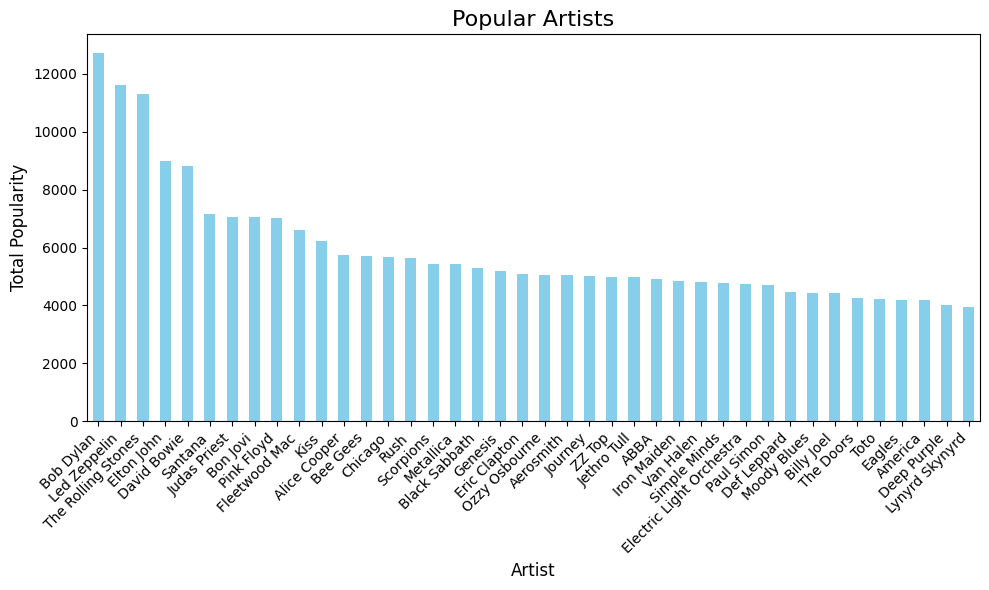

In [9]:

popular_artists = artist_pop[artist_pop > avg_likeability].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
popular_artists.plot(kind ='bar', color='skyblue')

plt.title('Popular Artists', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Total Popularity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
dance = df['Danceability']
dance.head()

0    0.521
1    0.535
2    0.563
3    0.638
4    0.388
Name: Danceability, dtype: float64

In [11]:
df['Duration'] = df['Duration'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
print(df['Duration'])

0        193
1        283
2        313
3        249
4        357
        ... 
14413    227
14414    260
14415    198
14416    257
14417    249
Name: Duration, Length: 14418, dtype: int64


In [12]:
df = df.drop(['Track', 'Artist', 'Album'], axis=1)

#Seperating Variables for Machine Learning Model
X = df.drop("Popularity", axis=1)
y = df["Popularity"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=45)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Feature importance per category
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

Mean Squared Error: 186.67618131068923
R² Score: 0.14340321589089133
             Feature  Importance
0               Year    0.144323
6           Loudness    0.099620
1           Duration    0.091564
3       Danceability    0.082859
11          Liveness    0.080832
9       Acousticness    0.080476
12           Valence    0.079686
8        Speechiness    0.078404
13             Tempo    0.073578
10  Instrumentalness    0.071500
4             Energy    0.068963
5                Key    0.036231
7               Mode    0.007423
2     Time_Signature    0.004540


In [15]:
from sklearn.model_selection import GridSearchCV

# Parameter grid, making it loop through data many times
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 4, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Random Forest Regressor, with random state 45
rf = RandomForestRegressor(random_state=45)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)


/Users/jacksonsorenson/myenv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters:  {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}


In [16]:
# Extract best parameters
best_params = grid_search.best_params_

# Refit Random Forest with the best parameters
rf_optimized = RandomForestRegressor(**best_params, random_state=45)
rf_optimized.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=4,
                      n_estimators=500, random_state=45)

In [18]:
y_pred = rf_optimized.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R² score: 0.14816445679822454
Mean Squared Error: 185.63857495099967


/var/folders/ty/kkyy7c9s4059czrtyxg_0mz40000gn/T/ipykernel_9993/2549215290.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feature_importances, palette="viridis")


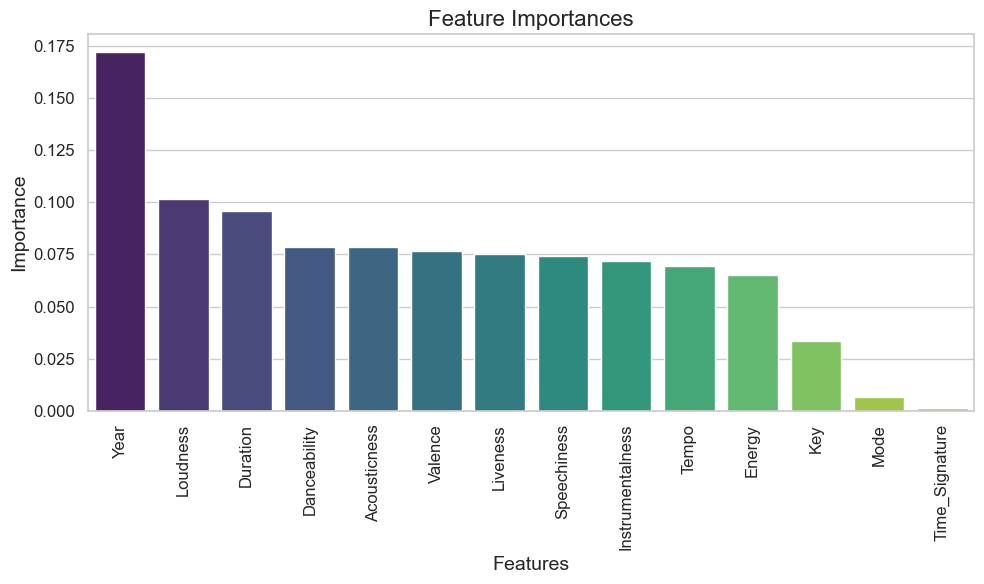

In [21]:
import seaborn as sns

feature_importances = pd.DataFrame({
    'Feature': X_train.columns[indices],
    'Importance': importances[indices]
})

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x='Feature', y='Importance', data=feature_importances, palette="viridis")

plt.title("Feature Importances", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)

plt.tight_layout()
plt.show()

In [24]:
#SAVE THE MODEL!! I HAD TO RUN THIS FOR ANOTHER HOUR BECASUE I DID NOT SAVE IT ORIGINALLY 
import joblib

joblib.dump(rf_optimized, 'optimized_rf_model.pkl')

['optimized_rf_model.pkl']

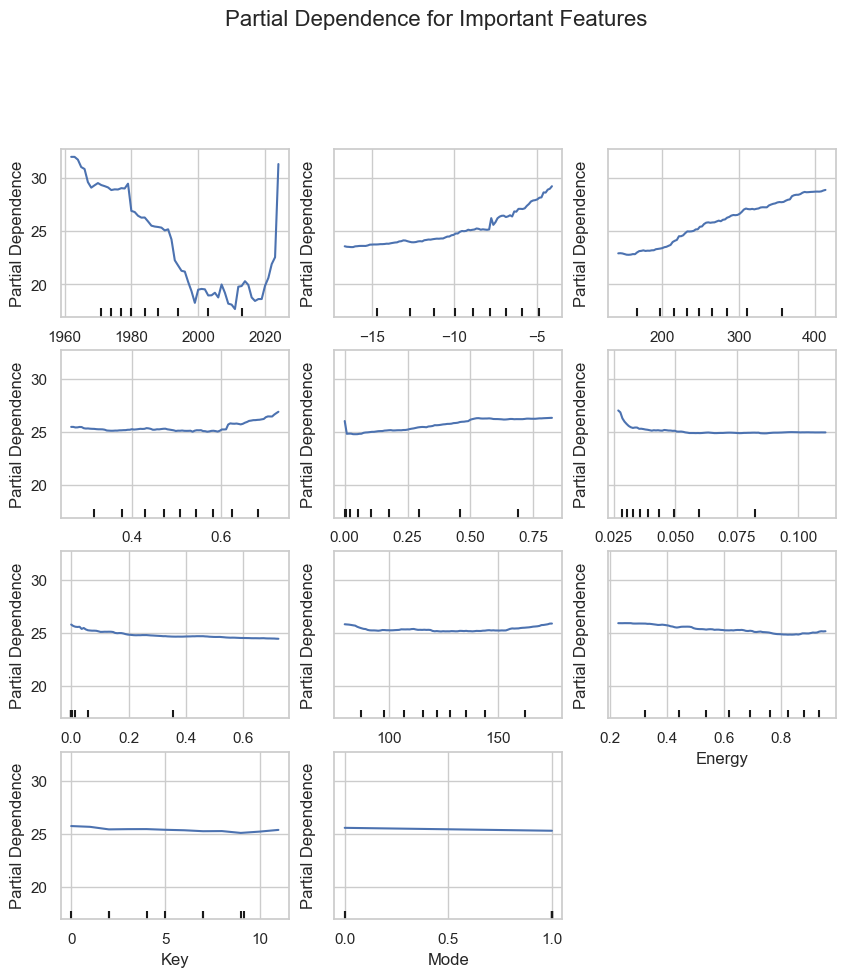

In [29]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 10))  
pdp_display = PartialDependenceDisplay.from_estimator(
    rf_optimized, X_train, ['Year', 'Loudness', 'Duration','Danceability','Acousticness','Speechiness','Instrumentalness', 'Tempo', 'Energy', 'Key', 'Mode'],
    ax=ax
)

for ax_row in pdp_display.axes_.ravel():
    if ax_row is not None: 
        ax_row.set_ylabel("Partial Dependence", fontsize=12)  
        ax_row.set_xlabel(ax_row.get_xlabel(), fontsize=12)

plt.suptitle("Partial Dependence for Important Features", fontsize=16, y=1.02)

plt.show()